# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load Data

In [2]:
data = pd.read_parquet("Data/DSB_BDK_trainingset.parquet")

In [3]:
random_state=42

In [4]:
data.isnull().sum().sum()

0

# Understand data
Load the findings to a .csv file

In [5]:
data

,togpunktlighed,koreplan_antal_planlagte_unik_tognr_togpkt_myldretid,koreplan_antal_planlagte_prod_kode_myldretid,koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_myldretid,koreplan_stdafv_antal_unik_tognr_alle_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_g_meld_myldretid,koreplan_antal_planlagte_togfoelge_under_5_min_myldretid,koreplan_gns_planlagte_togfoelg_alle_min_myldretid,koreplan_stdafv_planlagte_togfoelg_alle_min_myldretid,...,dsb_tgf_fte,dsb_tgf_raadighed,dsb_tgf_sygdom,dsb_tgf_relative_sygdom,dsb_lkf_fte,dsb_lkf_sygdom,dsb_lkf_relative_sygdom,dsb_haandvaerker,dsb_fravaer,dsb_relative_fravaer
dato,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.941,5.0,2.0,0.41,5.0,0.41,0.0,0.0,150.00,180.00,...,48.356640,0.000000,0.0,0.000000,67.500031,0.000000,0.000000,482.0,4.594,0.047412
2016-01-01,0.882,8.0,2.0,0.82,8.0,0.82,0.0,0.0,85.57,129.41,...,48.356640,0.000000,0.0,0.000000,67.500031,0.000000,0.000000,482.0,4.594,0.047412
2016-01-01,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,48.356640,0.000000,0.0,0.000000,67.500031,0.000000,0.000000,482.0,4.594,0.047412
2016-01-01,0.941,13.0,3.0,1.33,13.0,1.33,0.0,0.0,50.00,107.40,...,163.808955,117.900002,4.0,0.024419,186.132726,20.680000,0.111104,482.0,4.594,0.047412
2016-01-01,0.971,16.0,4.0,1.51,16.0,1.51,0.0,3.0,46.00,94.66,...,163.808955,117.900002,4.0,0.024419,186.132726,20.680000,0.111104,482.0,4.594,0.047412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,0.960,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.0,0.000000,29.000000,22.520000,0.776552,493.0,6.379,0.040891
2022-12-31,1.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,100.505023,34.000000,4.0,0.039799,102.000000,23.799999,0.233333,493.0,6.379,0.040891
2022-12-31,0.789,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,148.977671,34.600000,1.0,0.006712,97.000000,24.270000,0.250206,493.0,6.379,0.040891


In [6]:
# Define the dataframe and columns
feature_information = pd.DataFrame(columns=['Navn','Cat/Num','Datatype','Min', 'Max', 'Mean', 'Std', 'Notes'])

In [7]:
# Easily extract needed value from the decribe function with integer-conversion 
def extract_from_describe(described, descriptor):
    value = described[descriptor]
    if value.is_integer():
        return int(value)
    return value

In [8]:
# Insert rows in dataframe
cat_var = []
for col in data.columns:
    if data[col].dtypes == 'O':
        df = pd.DataFrame({'Navn': col, 'Cat/Num': 'Categorical'}, index=[0])
        feature_information = pd.concat([feature_information, df], ignore_index=True)
        cat_var += [col]
    else:
        col_data = data[col].describe()
        min1 = extract_from_describe(col_data, 'min')
        max1 = extract_from_describe(col_data, 'max')
        mean1 = extract_from_describe(col_data, 'mean')
        std1 = extract_from_describe(col_data, 'std')
        datatype = 'float'
        if np.array_equal(data[col], data[col].astype(int)):
            datatype = 'int'
        df = pd.DataFrame({'Navn': col, 'Cat/Num': 'Numerical','Datatype': datatype,'Min':min1
                           , 'Max':max1, 'Mean': mean1, 'Std': std1}, index=[0])
        feature_information = pd.concat([feature_information, df], ignore_index=True)

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_1309/2132421730.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_information = pd.concat([feature_information, df], ignore_index=True)


In [9]:
# The final result
feature_information

,Navn,Cat/Num,Datatype,Min,Max,Mean,Std,Notes
0,togpunktlighed,Numerical,float,0,1,0.821591,0.238724,NaN
1,koreplan_antal_planlagte_unik_tognr_togpkt_myl...,Numerical,int,0,163,15.861782,22.462998,NaN
2,koreplan_antal_planlagte_prod_kode_myldretid,Numerical,int,0,16,2.295729,2.598718,NaN
3,koreplan_stdafv_antal_unik_prod_kode_per_time_...,Numerical,float,0,2.66,0.291664,0.378702,NaN
4,koreplan_antal_planlagte_unik_tognr_alle_myldr...,Numerical,int,0,186,18.283891,25.067110,NaN
...,...,...,...,...,...,...,...,...
204,dsb_lkf_sygdom,Numerical,float,0,560.810013,24.714636,36.975722,NaN
205,dsb_lkf_relative_sygdom,Numerical,float,0,7.4,0.261011,0.320053,NaN
206,dsb_haandvaerker,Numerical,int,297,564,465.667038,82.965696,NaN
207,dsb_fravaer,Numerical,float,0.673,58.199001,12.309633,6.298575,NaN


In [10]:
# Save as .csv file
feature_information.to_csv("Data/Feature_information.csv", float_format='%.3f')

In [11]:
# Check togpunktligheds trends over tid
mean_per_date = data.groupby('dato')['togpunktlighed'].mean()

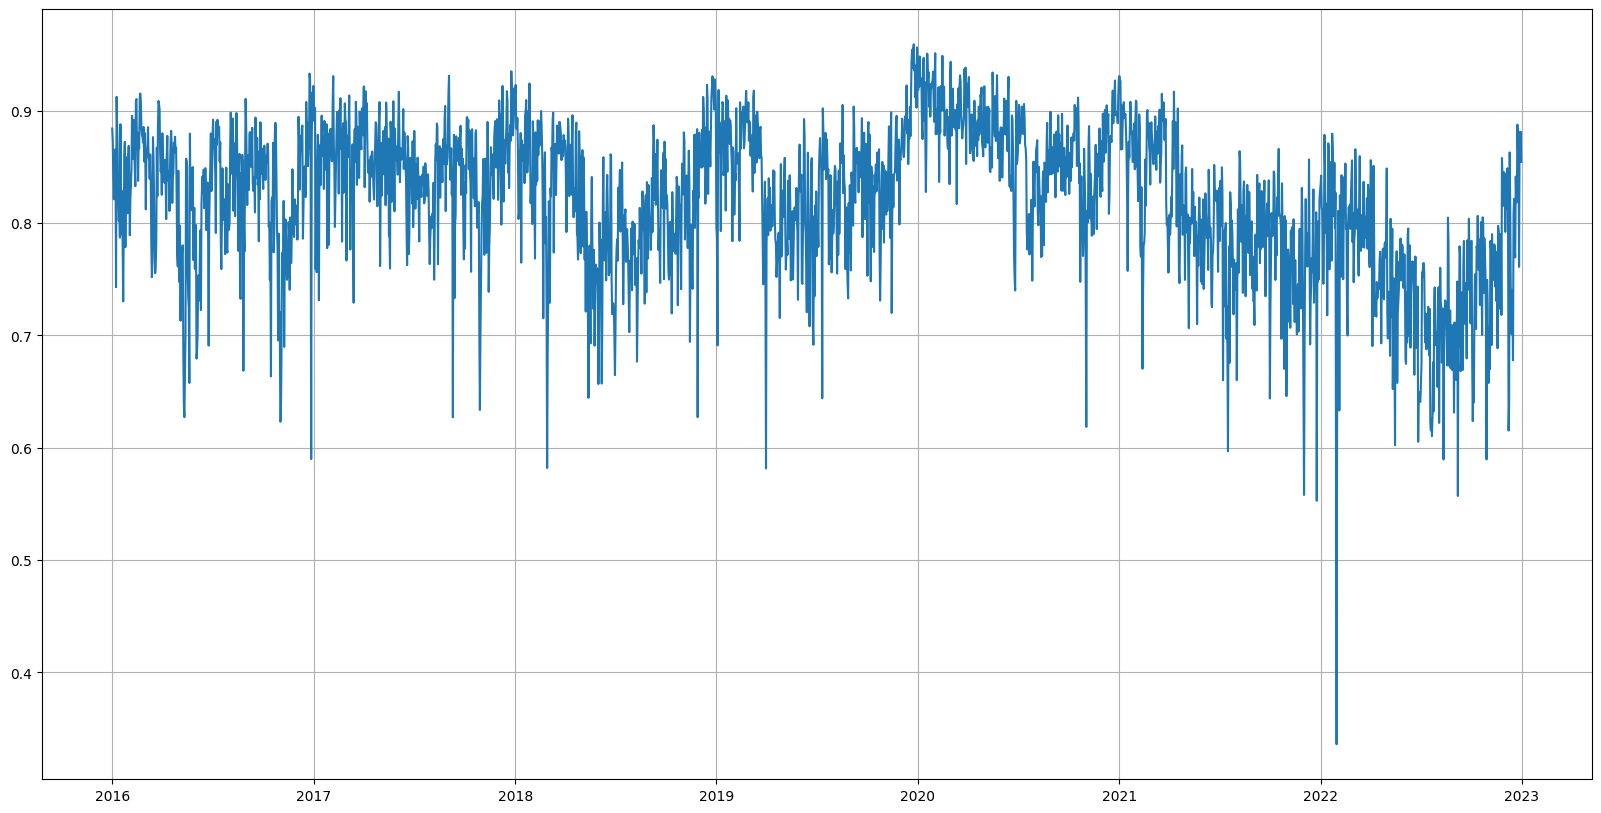

In [12]:
mean_per_date.index = pd.to_datetime(mean_per_date.index, format='%d-%m-%Y')

# Sort the DataFrame by dates
mean_per_date_sorted = mean_per_date.sort_index()

# Plot the sorted data
plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(mean_per_date_sorted)

In [13]:
# Check if stationary ???
# https://machinelearningmastery.com/time-series-data-stationary-python/

# Only Kystbanen test with Random Forest

In [14]:
# The columns that are marked "Categorical" often contains separator errors.
cat_var
len(cat_var)

0

In [15]:
# Only looking at Kystbanen
# We exclude the "Categorical" columns for now
data_20 = data[data["visualiseringskode"] == 20]
data_20 = data_20.drop(cat_var,axis=1)

In [16]:
data_20.shape

(10228, 209)

In [17]:
data_20

,togpunktlighed,koreplan_antal_planlagte_unik_tognr_togpkt_myldretid,koreplan_antal_planlagte_prod_kode_myldretid,koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_myldretid,koreplan_stdafv_antal_unik_tognr_alle_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_g_meld_myldretid,koreplan_antal_planlagte_togfoelge_under_5_min_myldretid,koreplan_gns_planlagte_togfoelg_alle_min_myldretid,koreplan_stdafv_planlagte_togfoelg_alle_min_myldretid,...,dsb_tgf_fte,dsb_tgf_raadighed,dsb_tgf_sygdom,dsb_tgf_relative_sygdom,dsb_lkf_fte,dsb_lkf_sygdom,dsb_lkf_relative_sygdom,dsb_haandvaerker,dsb_fravaer,dsb_relative_fravaer
dato,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.873,18.0,4.0,0.41,25.0,0.41,0.0,0.0,30.48,76.58,...,401.312420,81.300003,15.0,0.037377,44.000000,0.000000,0.000000,348.0,5.054,0.082654
2016-01-01,0.942,69.0,8.0,1.26,74.0,1.75,0.0,38.0,9.75,42.57,...,401.312420,81.300003,15.0,0.037377,377.354956,91.060000,0.241311,348.0,5.054,0.082654
2016-01-01,0.916,98.0,9.0,1.17,113.0,3.19,4.0,42.0,21.80,79.69,...,401.312420,81.300003,15.0,0.037377,377.354956,91.060000,0.241311,348.0,5.054,0.082654
2016-01-01,0.932,54.0,4.0,0.41,56.0,2.94,2.0,0.0,26.23,69.74,...,401.312420,81.300003,15.0,0.037377,44.000000,0.000000,0.000000,348.0,5.054,0.082654
2016-01-02,0.857,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,401.312420,76.000000,15.0,0.037377,44.000000,0.000000,0.000000,348.0,5.054,0.082654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30,0.926,72.0,1.0,0.00,72.0,0.00,0.0,24.0,20.14,61.46,...,334.598766,96.900000,14.0,0.041841,44.000000,21.100000,0.479545,298.0,8.777,0.207649
2022-12-31,0.934,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,334.598766,62.000000,7.0,0.020921,44.000000,0.000000,0.000000,298.0,3.777,0.095619
2022-12-31,0.891,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,334.598766,62.000000,7.0,0.020921,304.000000,103.150002,0.339309,298.0,3.777,0.095619


In [18]:
# Divide into input and target.
# Divide into train and test set. 
X = data_20.iloc[:,1:]
y = data_20.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = random_state)

In [19]:
X.shape

(10228, 208)

In [20]:
y.shape

(10228,)

In [21]:
# Check sizes and dtypes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
X_train.info()

Shape of X_train: (9205, 208)
Shape of X_test: (1023, 208)
Shape of y_train: (9205,)
Shape of y_test: (1023,)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9205 entries, 2022-04-02 to 2020-12-22
Columns: 208 entries, koreplan_antal_planlagte_unik_tognr_togpkt_myldretid to dsb_relative_fravaer
dtypes: float32(24), float64(135), int32(2), int64(47)
memory usage: 13.8 MB


In [22]:
#Build Random Forest Regression Model
regressor = RandomForestRegressor(n_estimators=100, random_state=random_state, oob_score=True, max_depth=5)

In [23]:
# Train model
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, oob_score=True, random_state=42)

In [28]:
# Test model
predictions_model = regressor.predict(X_test)
# Mean baseline
predictions_baseline = [np.mean(y_train)] * len(y_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_model = mean_squared_error(y_test, predictions_model)
mse_baseline = mean_squared_error(y_test, predictions_baseline)
print(f'Mean Squared Error of Model: {mse_model}')
print(f'Mean Squared Error of Baseline: {mse_baseline}')

r2_model = r2_score(y_test, predictions_model)
r2_baseline = r2_score(y_test, predictions_baseline)
print(f'R-squared of Model: {r2_model}')
print(f'R-squared of Baseline: {r2_baseline}')

Mean Squared Error of Model: 0.007852444218724285
Mean Squared Error of Baseline: 0.028161482442093214
R-squared of Model: 0.720778252686378
R-squared of Baseline: -0.0013822595101011803


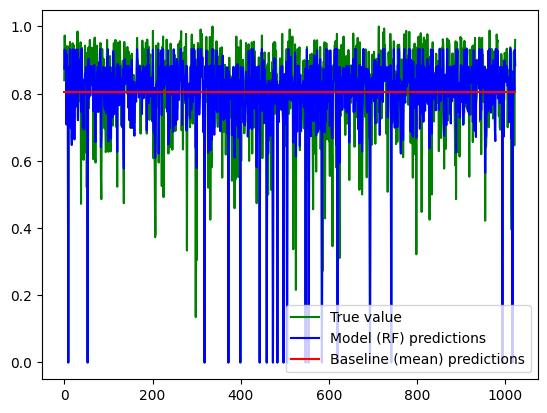

In [42]:
x_plot = range(len(y_test))
plt.plot(x_plot, y_test, label = "True value", color = "green")
plt.plot(x_plot, predictions_model, label="Model (RF) predictions", color = "blue")
plt.plot(x_plot, predictions_baseline, label="Baseline (mean) predictions", color = "red")
plt.legend()

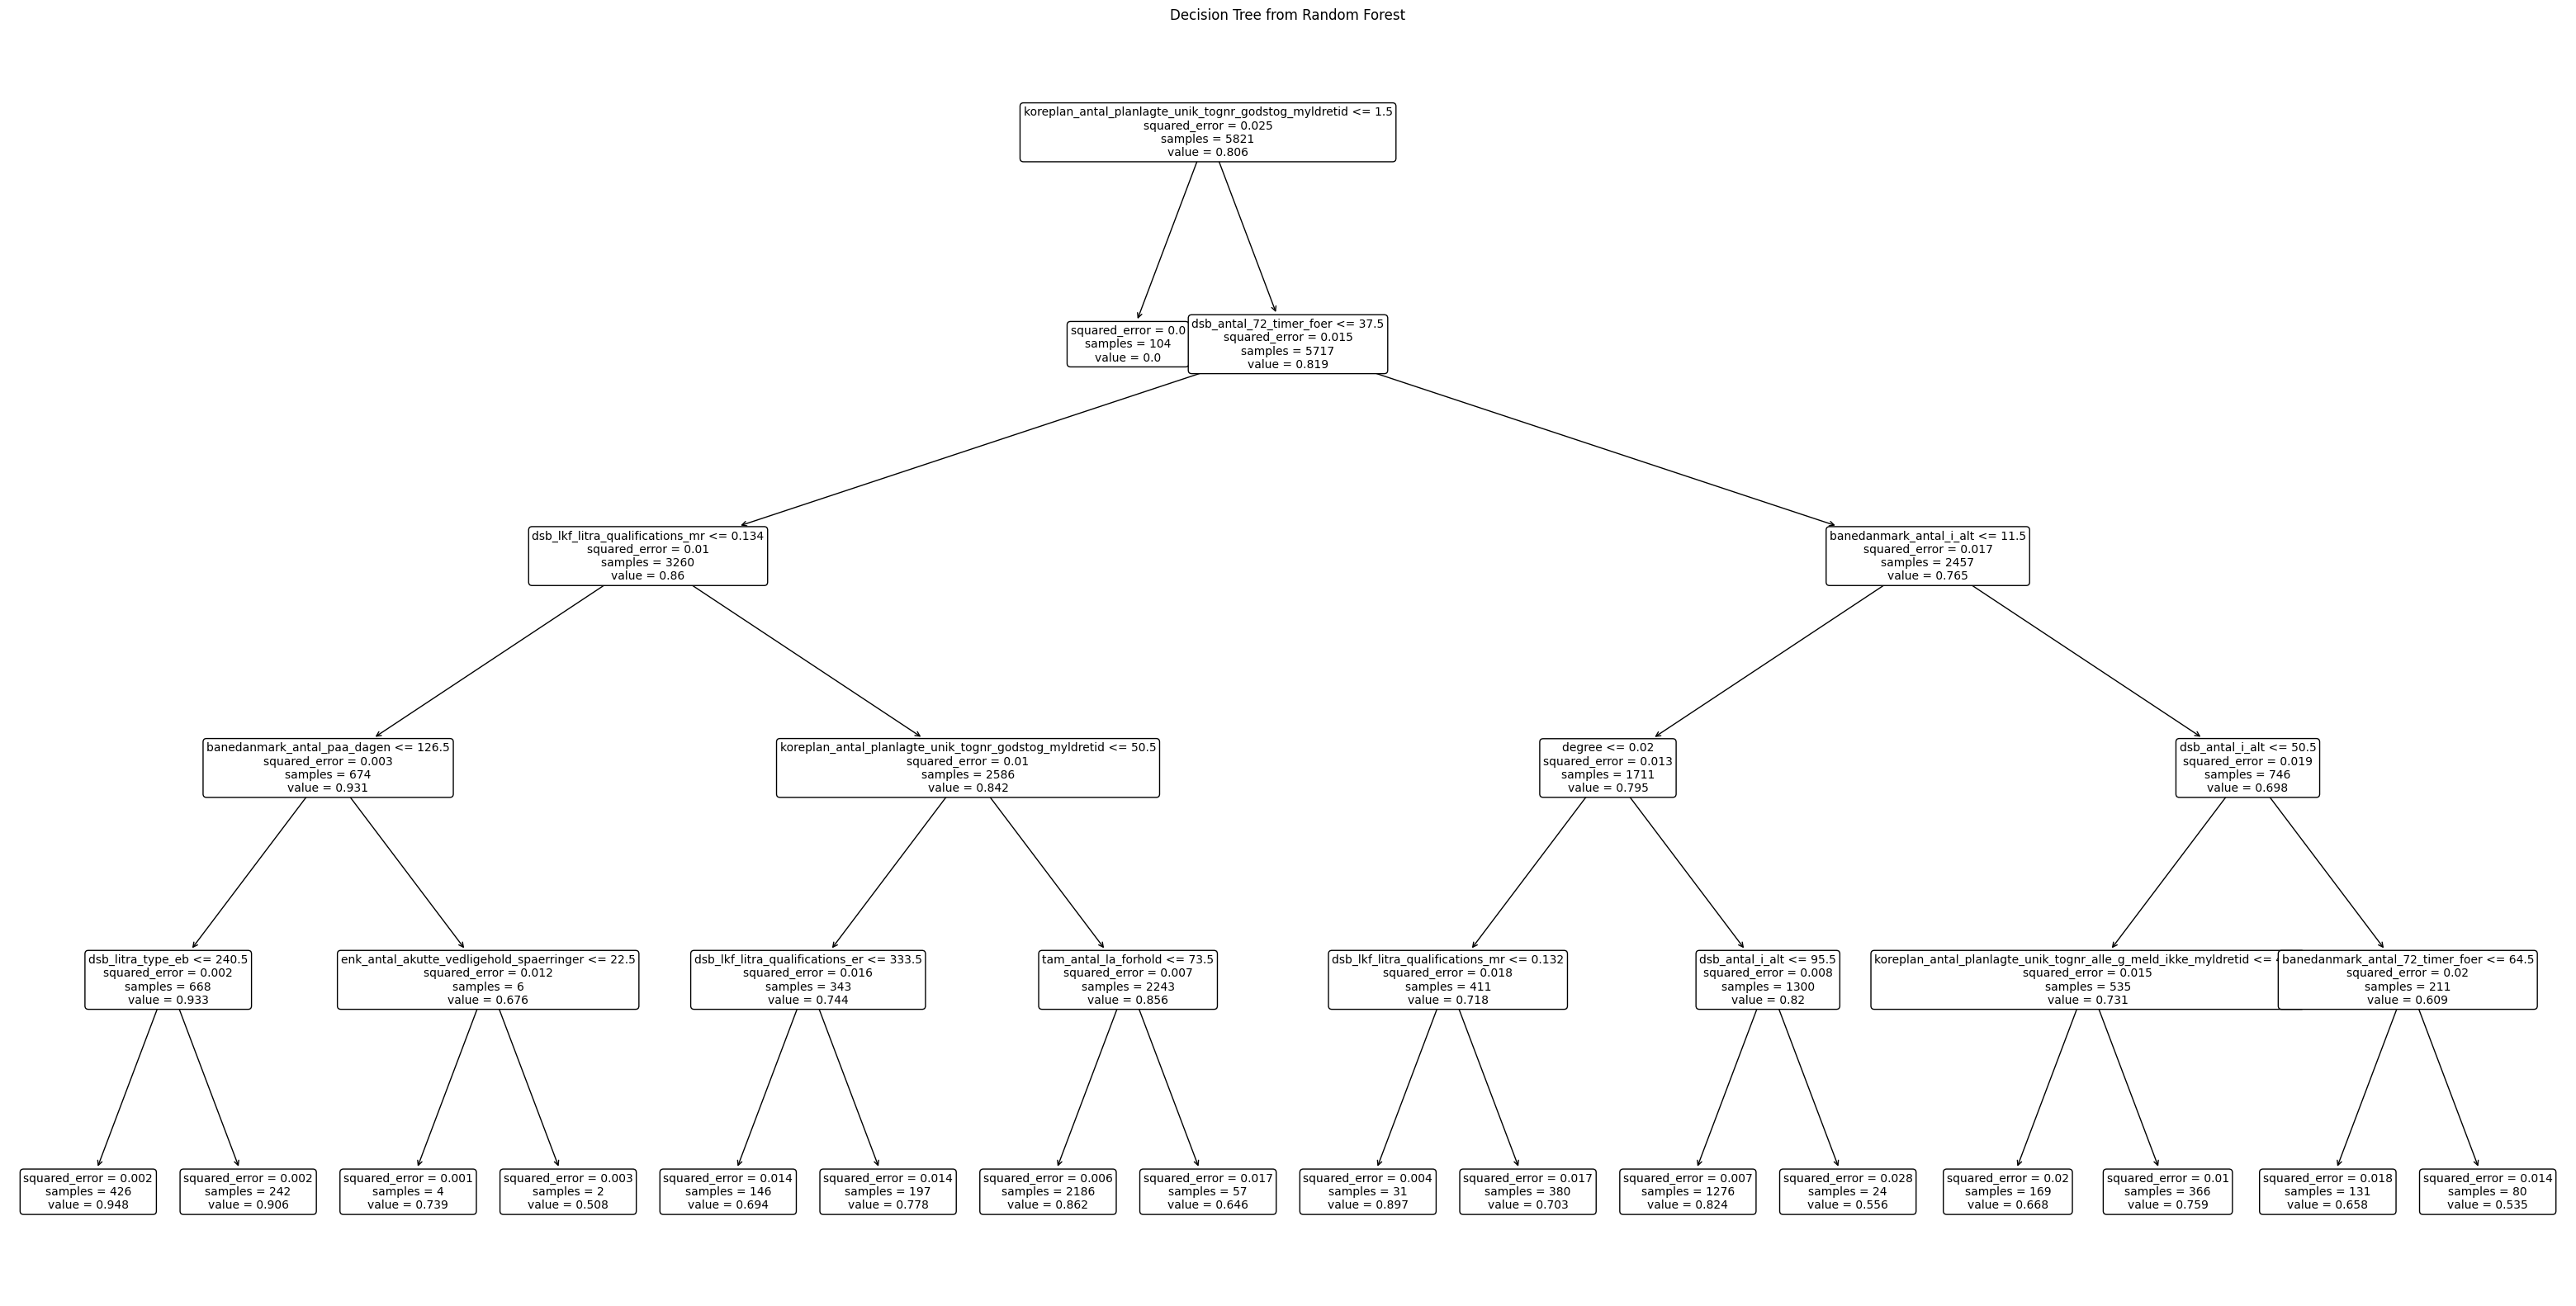

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Regressor is the trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(40, 20))
plot_tree(tree_to_plot, feature_names=data_20.columns.tolist(), filled=False, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

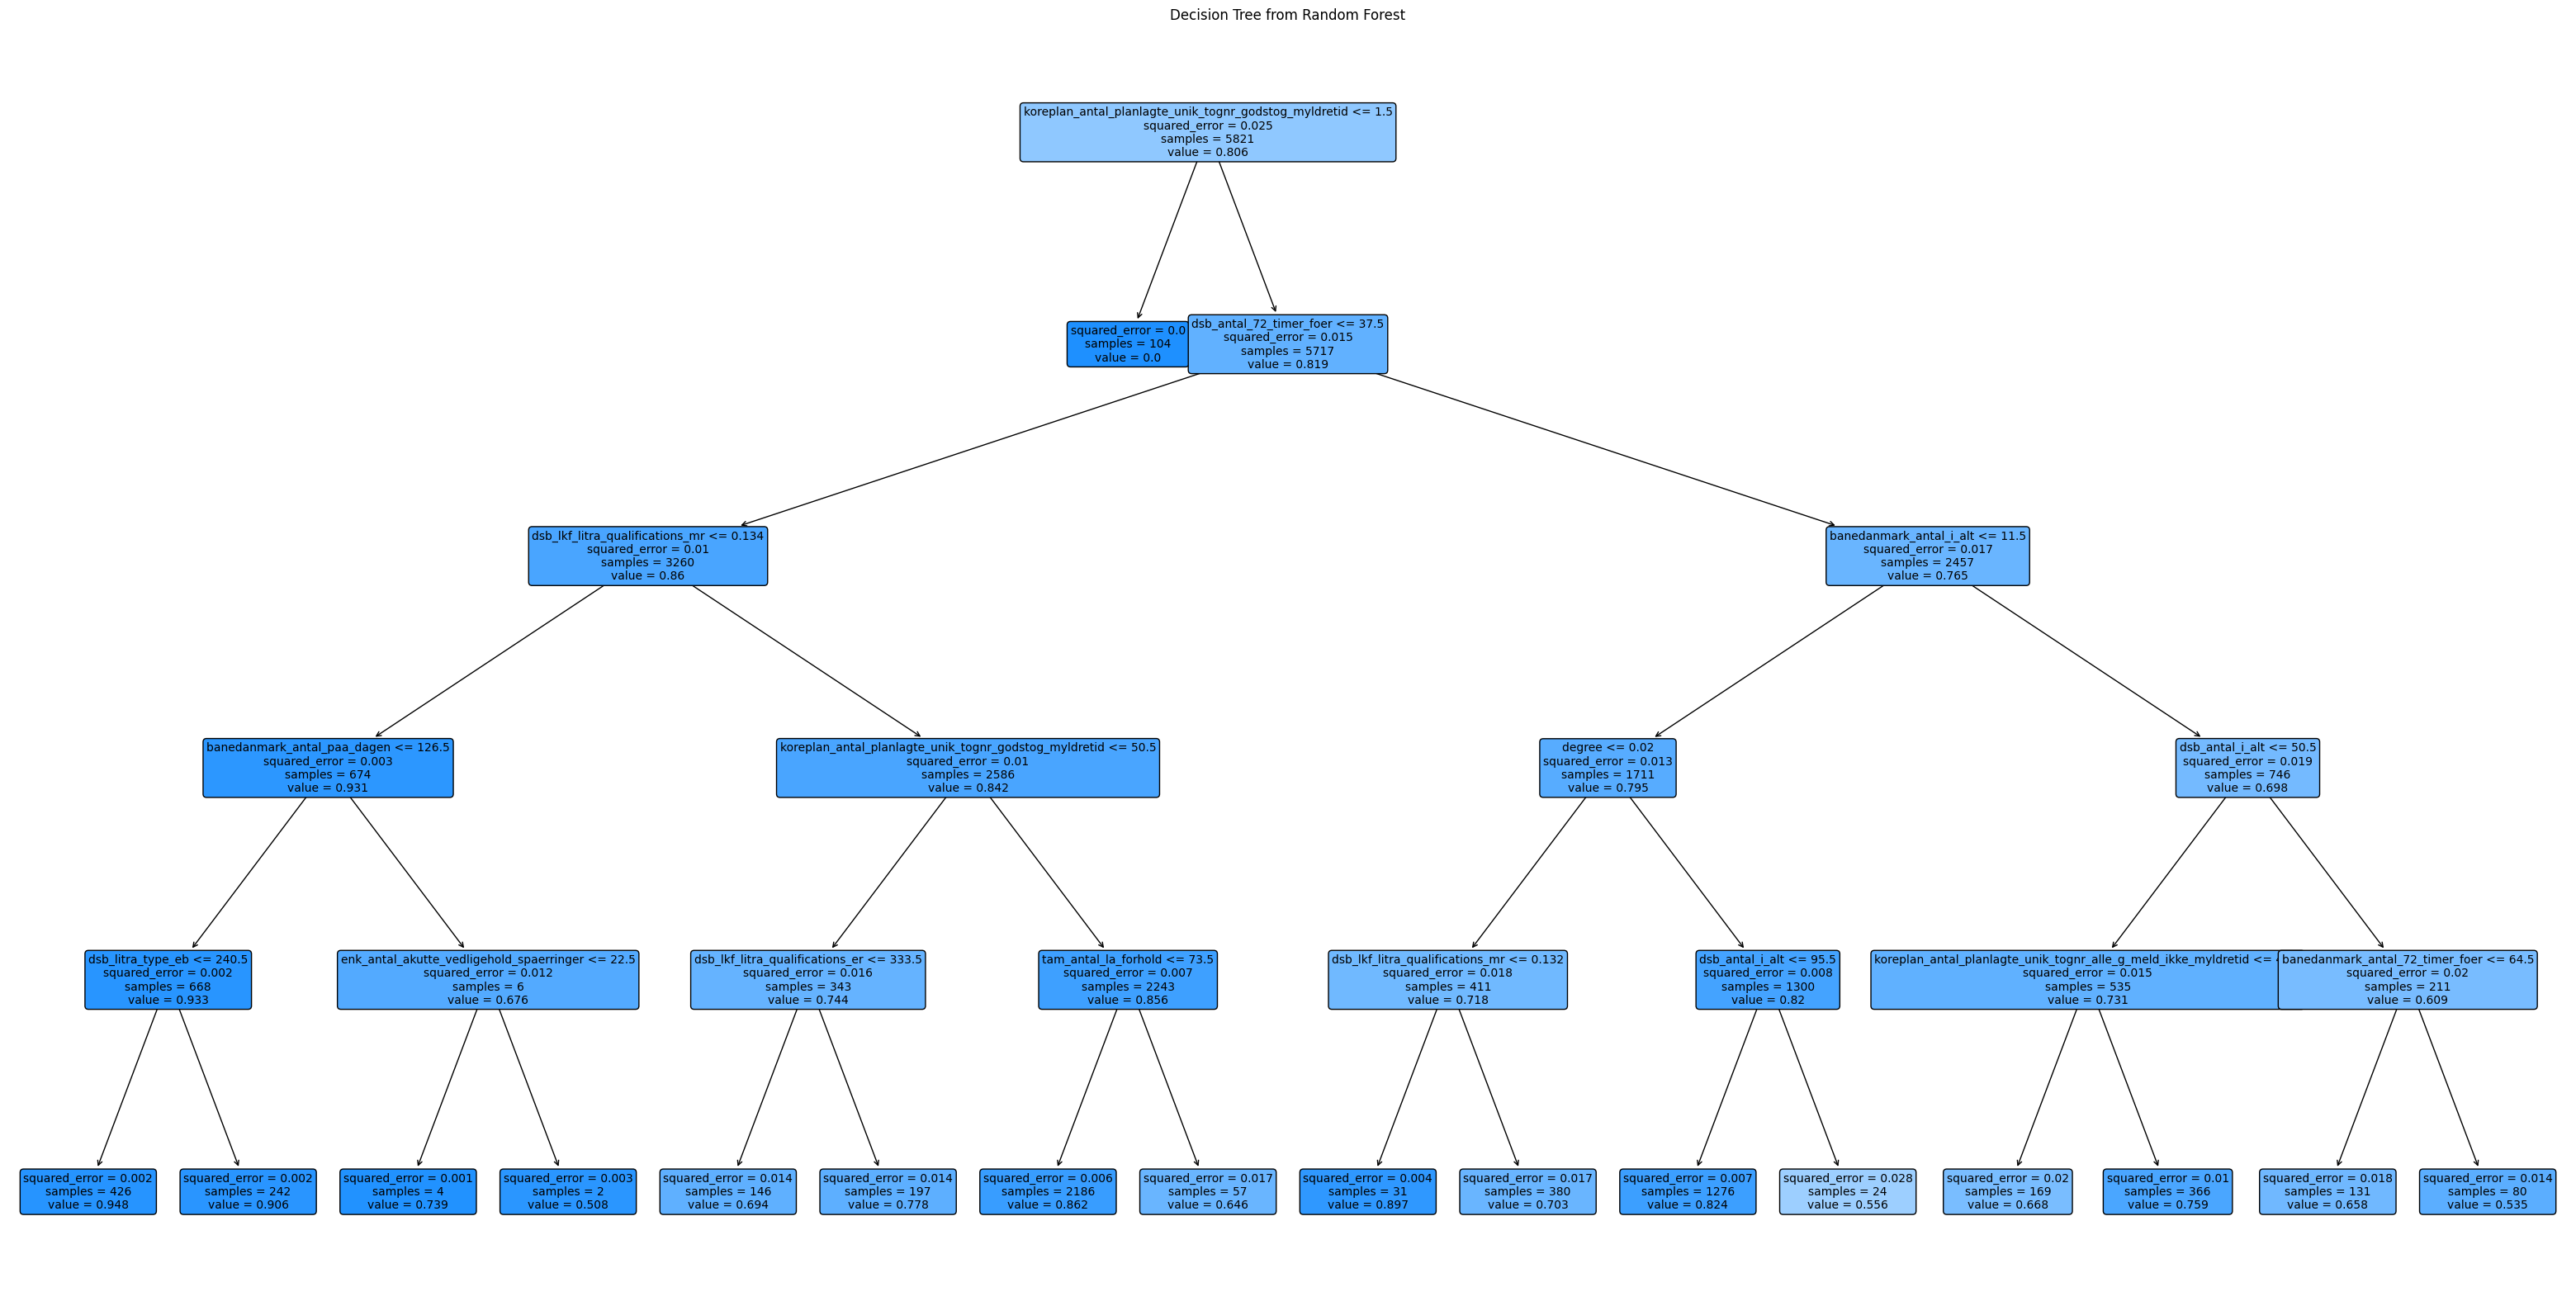

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb

 
# Regressor is the trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(40, 20))
artists = plot_tree(tree_to_plot, feature_names=data_20.columns.tolist(), filled=False, rounded=True, fontsize=10)

colors = ['dodgerblue']

for artist, impurity, value in zip(artists, tree_to_plot.tree_.impurity, tree_to_plot.tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 20
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))

plt.title("Decision Tree from Random Forest")
plt.show()

In [27]:
from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree_to_plot, out_file = 'tree.dot', feature_names = data_20.drop("togpunktlighed", axis=1).columns.tolist(), rounded = True, precision = 2)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [28]:
# Tjek hvor mange gange de forskellige features bliver brugt
feature_names = data_20.drop("togpunktlighed", axis=1).columns.tolist()

occurences = {feature_names[i]: 0 for i in range(len(feature_names))}

for i in range(len(regressor.estimators_)):
    one_tree_feature = regressor.estimators_[i].tree_.feature
    for j in one_tree_feature:
        occurences[feature_names[j]] += 1



In [29]:
occurences

{'koreplan_antal_planlagte_unik_tognr_togpkt_myldretid': 2,
 'koreplan_antal_planlagte_prod_kode_myldretid': 3,
 'koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid': 15,
 'koreplan_antal_planlagte_unik_tognr_alle_myldretid': 1,
 'koreplan_stdafv_antal_unik_tognr_alle_per_time_myldretid': 1,
 'koreplan_antal_planlagte_unik_tognr_alle_g_meld_myldretid': 0,
 'koreplan_antal_planlagte_togfoelge_under_5_min_myldretid': 5,
 'koreplan_gns_planlagte_togfoelg_alle_min_myldretid': 4,
 'koreplan_stdafv_planlagte_togfoelg_alle_min_myldretid': 3,
 'koreplan_antal_planlagte_unik_tognr_godstog_myldretid': 0,
 'koreplan_antal_planlagte_unik_tognr_togpkt_ikke_myldretid': 242,
 'koreplan_antal_planlagte_prod_kode_ikke_myldretid': 5,
 'koreplan_stdafv_antal_unik_prod_kode_per_time_ikke_myldretid': 1,
 'koreplan_antal_planlagte_unik_tognr_alle_ikke_myldretid': 29,
 'koreplan_stdafv_antal_unik_tognr_alle_per_time_ikke_myldretid': 5,
 'koreplan_antal_planlagte_unik_tognr_alle_g_meld_ikke_myldretid': 5

In [30]:
sorted(occurences, key=occurences.get, reverse=True)

['dsb_haandvaerker',
 'koreplan_antal_planlagte_unik_tognr_togpkt_ikke_myldretid',
 'banedanmark_antal_72_timer_foer',
 'dsb_lkf_litra_relative_qualifications_abs',
 'banedanmark_antal_paa_dagen',
 'dsb_antal_paa_dagen',
 'antal_forsinkelse_fra_sverige_ikke_myldretid',
 'dsb_antal_i_alt',
 'ekstern_antal_72_timer_foer',
 'dsb_litra_type_er',
 'banedanmark_antal_i_alt',
 'station',
 'dsb_antal_72_timer_foer',
 'betweenness',
 'koreplan_antal_planlagte_unik_tognr_alle_ikke_myldretid',
 'dsb_lkf_litra_qualifications_et',
 'degree',
 'koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid',
 'SEASON_COS',
 'dsb_antal_uberoert',
 'sap_sporskifte_antal_vedligehold_opgaver',
 'dsb_lkf_litra_qualifications_mq',
 'koreplan_antal_planlagte_togfoelge_under_5_min_ikke_myldretid',
 'koreplan_gns_planlagte_togfoelg_alle_min_ikke_myldretid',
 'dsb_lkf_litra_qualifications_mf',
 'dsb_lkf_litra_relative_qualifications_mg',
 'dsb_litra_km_accumulated_ets',
 'dsb_relative_kompetencer_hvk_et',
 'koreplan

# Statistical Feature Selection

## Filter methods

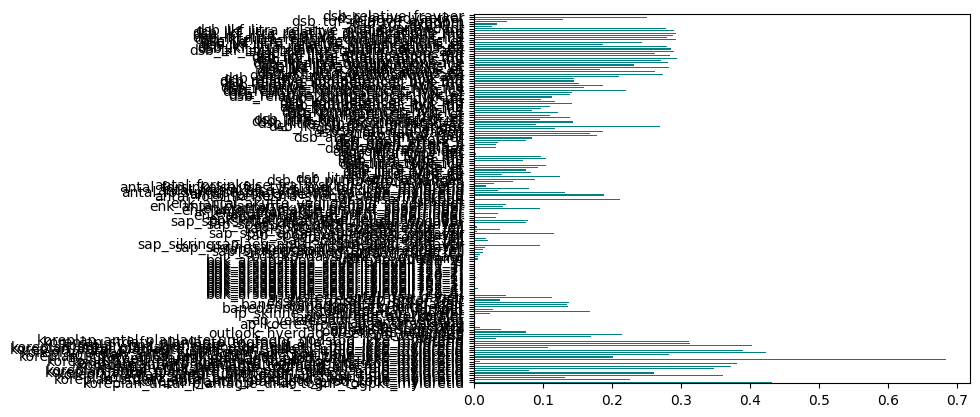

In [31]:
# Information gain
from sklearn.feature_selection import mutual_info_regression
importances = mutual_info_regression(X,y)
feat_importances= pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind="barh", color= "teal")
plt.show()

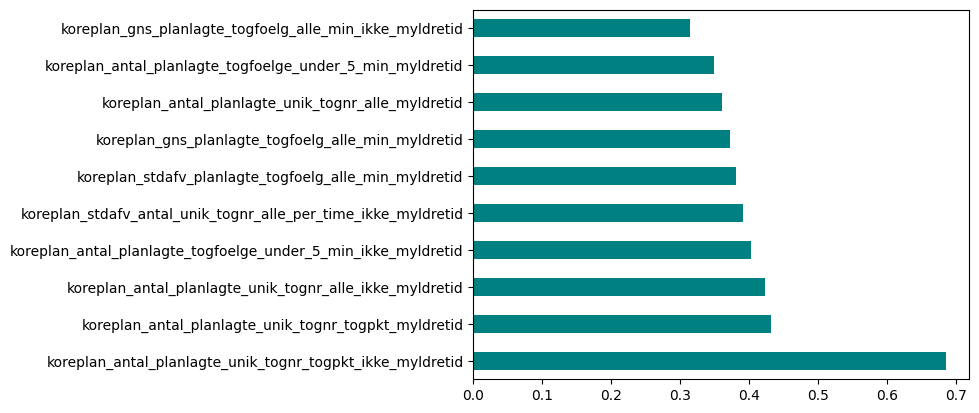

In [32]:
feat_importances_top10 = feat_importances.sort_values(ascending=False)[:10]
feat_importances_top10.plot(kind="barh", color= "teal")
plt.show()

<Axes: >

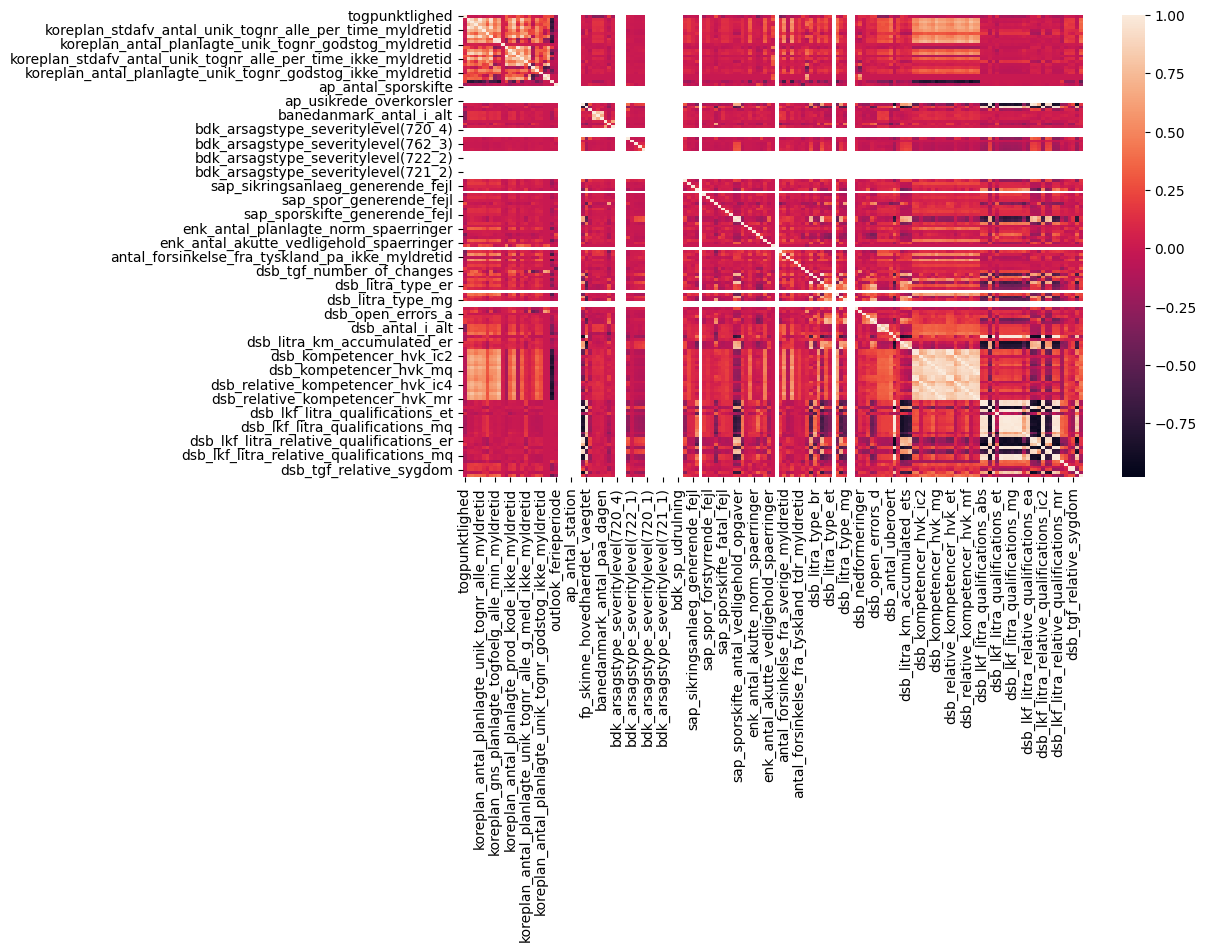

In [33]:
# Correlation Coefficient
import seaborn as sns
cor = data_20.corr()

# Plotting
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = False)

In [34]:
cor.loc[['togpunktlighed'],:]["bdk_arsagstype_severitylevel(720_1)"]

togpunktlighed   NaN
Name: bdk_arsagstype_severitylevel(720_1), dtype: float64

<Axes: >

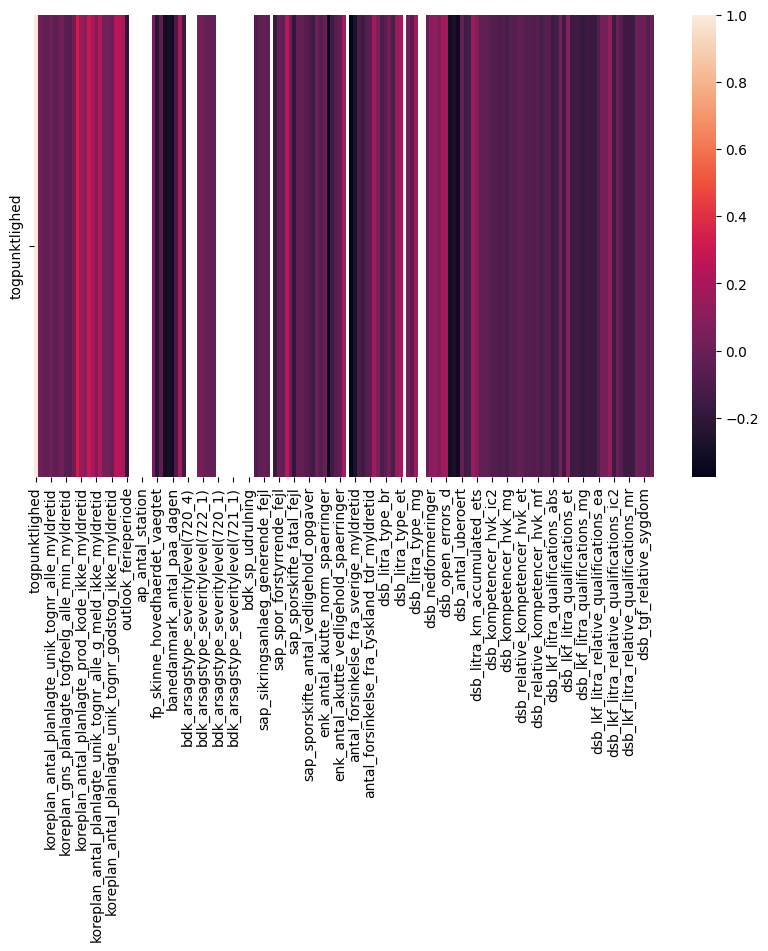

In [35]:
# Plotting only togpunktlighed
plt.figure(figsize = (10,6))
sns.heatmap(cor.loc[['togpunktlighed'],:], annot = False)
# explanation: https://stackoverflow.com/questions/22655667/dataframe-correlation-produces-nan-although-its-values-are-all-integers

In [36]:
# Variance Threshold
print(f"Shape of X: {X.shape}")
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
print(f"Shape of X: {X.shape}")

Shape of X: (10228, 162)
Shape of X: (10228, 162)


In [37]:
# Univariate feature selection with f regression good for nummerical inputs
# works by selecting the best features based on univariate statistical tests. 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
print(f"Shape of X: {X.shape}")
X_new = SelectKBest(f_regression, k=10).fit_transform(X, y)
print(f"Shape of X: {X_new.shape}")

Shape of X: (10228, 162)
Shape of X: (10228, 10)


In [38]:
# Univariate feature selection with r_regression.
# works by selecting the best features based on univariate statistical tests. 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
print(f"Shape of X: {X.shape}")
fitted = SelectKBest(r_regression, k=10).fit(X, y)
X_new = fitted.transform(X)
features_selected = fitted.get_support()
print(f"Shape of X: {X_new.shape}")

# Selected features
X.columns[features_selected]

Shape of X: (10228, 162)
Shape of X: (10228, 10)


Index(['koreplan_antal_planlagte_unik_tognr_togpkt_ikke_myldretid',
       'koreplan_antal_planlagte_unik_tognr_alle_ikke_myldretid',
       'koreplan_antal_planlagte_togfoelge_under_5_min_ikke_myldretid',
       'degree', 'betweenness', 'ekstern_antal_i_alt',
       'bdk_sp_days_since_sw_update', 'sap_spor_antal_haster_opgaver',
       'dsb_litra_type_et', 'dsb_open_errors_d'],
      dtype='object')

## Wrapper Methods

In [39]:
# Recursive feature elimination more advanced but should work with feature_importances_
# Feature selection using SelectFromModel works with random forest as regressor.feature_importances_
# Sequential feature selection also a bit advanced. 

TypeError: 'NoneType' object is not iterable

In [42]:
X_train

,koreplan_antal_planlagte_unik_tognr_togpkt_myldretid,koreplan_antal_planlagte_prod_kode_myldretid,koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_myldretid,koreplan_stdafv_antal_unik_tognr_alle_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_g_meld_myldretid,koreplan_antal_planlagte_togfoelge_under_5_min_myldretid,koreplan_gns_planlagte_togfoelg_alle_min_myldretid,koreplan_stdafv_planlagte_togfoelg_alle_min_myldretid,koreplan_antal_planlagte_unik_tognr_godstog_myldretid,...,dsb_lkf_litra_relative_qualifications_me,dsb_lkf_litra_relative_qualifications_mg,dsb_lkf_litra_relative_qualifications_mq,dsb_lkf_litra_relative_qualifications_mr,dsb_event_count,dsb_0_1,dsb_tgf_sygdom,dsb_tgf_relative_sygdom,dsb_haandvaerker,dsb_relative_fravaer
178119,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.434426,0.843091,0.200234,0.108899,0.0,2,13.0,0.037178,300.0,0.039707
161179,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.428415,0.820765,0.226230,0.134426,0.0,10,18.0,0.048518,315.0,0.134698
174921,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.432526,0.837370,0.200692,0.106113,2.0,2,11.0,0.030901,303.0,0.140646
94941,27.0,4.0,0.41,40.0,1.21,0.0,12.0,17.95,59.68,0.0,...,0.411541,0.754343,0.322270,0.349944,0.0,7,13.0,0.033252,398.0,0.099519
166701,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.435123,0.821029,0.229306,0.133110,0.0,13,15.0,0.040995,315.0,0.102799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111805,128.0,7.0,0.63,143.0,2.99,3.0,75.0,10.27,43.63,0.0,...,0.414994,0.753102,0.320508,0.350151,0.0,16,25.0,0.062455,388.0,0.174156
101211,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.413200,0.759199,0.325112,0.352356,1.0,0,11.0,0.028930,395.0,0.037685
105097,131.0,6.0,0.41,150.0,3.10,6.0,82.0,17.25,70.56,0.0,...,0.412354,0.752046,0.319710,0.349683,0.0,2,10.0,0.026205,386.0,0.118441
16785,18.0,2.0,0.00,30.0,0.00,0.0,6.0,24.24,68.11,0.0,...,0.400546,0.755747,0.329170,0.430776,2.0,22,13.0,0.031715,363.0,0.095493


In [60]:
# Forward Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings

warnings.filterwarnings("ignore")
regressor = RandomForestRegressor(n_estimators=100, random_state=random_state, oob_score=True, max_depth=5)
ffs = SequentialFeatureSelector(regressor, k_features="best", forward=True, n_jobs=-1)
ffs.fit(X_train,y_train)
features = list(ffs.k_feature_names_)
regressor.fit(X_train[features],y_train)
y_pred=regressor.predict(X_test[features])

/Users/clarasofiechristiansen/anaconda3/envs/DSB_Bachelorprojekt/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/clarasofiechristiansen/anaconda3/envs/DSB_Bachelorprojekt/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/clarasofiechristiansen/anaconda3/envs/DSB_Bachelorprojekt/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/clarasofiechristiansen/anaconda3/envs/DSB_Bachelorprojekt/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

TypeError: 'NoneType' object is not iterable

In [51]:
# Med progressbar via pipeline? men stadig hashobject.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.2/257.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 20.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.3/380.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 22.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━